<h1>Pagerank - Álgebra Linear</h1>
<p>Fundação Getúlio Vargas - EMAp<br>
   Graduação em Ciência de Dados e Inteligência Artificial<br>
   Disciplina: Álgebra Linear<br>
   Professor: Yuri Fahham Saporito<br>
   Alunos: Cleomar Felipe Rabelo Antoszczyszyn e Gabriel Pastori Figueira</p>
    

<h2>1 Introdução</h2>

<p>A partir da última década, o acesso à informação se tornou acessível para a maioria das pessoas, devido à grande difusão da Internet. Através de uma simples pesquisa em alguma ferramenta de busca, os usuários podem acessar milhares de páginas web relacionadas ao assunto pesquisado. Mas como os buscadores decidem quais páginas mostrar primeiro dentre as centenas de milhões disponíveis? É claro que existe um algoritmo responsável por fazer essa estruturação. Nesse trabalho, será apresentado o algoritmo utilizado pelo Google, o Pagerank.</p>
<p>Além da explanação da técnica, também será exposto o processo de ranqueamento dos times do Brasileirão de 2019 e de 2020, utilizando códigos totalmente autorais em Python.</p>

<h2>2 Metodologia</h2>
<p>Para construir a explanação da teoria por trás do Pagerank, foram consultadas fontes confiáveis através da <i>web</i>, como artigos acadêmicos e portais científicos. Todas as referências foram devidamente inseridas ao final desse trabalho.</p>
<p>No que diz respeito à implementação, o código é totalmente autoral e foi criado a partir do nosso entendimento acerca da teoria do Pagerank. Para isso, foi utilizada a linguagem de programação Python e as bibliotecas Numpy, Pandas, Matplotlib e Networkx.</p>

<h2>3 Desenvolvimento</h2>

<h3>3.1 História</h3>
<p>Em 1996, enquanto faziam seu doutorado na Universidade de Oxford, Larry Page e Sergey Brin criaram o Pagerank. Diferentemente dos buscadores usuais da época, que retornavam resultados de acordo com a quantidade de palavras que correspondiam à busca, a ferramenta de Page classificava a importância das páginas de acordo com as relações que haviam entre elas. Esse método se mostrou muito mais eficiente e foi a base do que seria mais tarde a Google, empresa criada também por Larry Page e Sergey Brin.</p>

<h3>3.2 O algoritmo</h3>

<h4>3.2.1 Ideia geral</h4>
<p>O algoritmo Pagerank faz o ranqueamento de páginas levando em consideração outras páginas. As relações entre elas são feitas através de URLS, ou seja, se uma página B possui um link que leva a uma outra página A, a página A está relacionada à página B. Ampliando o exemplo para uma quantidade indefinida de páginas, quando é feita uma busca, cada página que possui algum tipo de relação com o que foi pesquisado recebe um índice, o chamado Pagerank.</p>
<p>Para calcular o índice de uma página A qualquer, devem ser consideradas duas coisas: a quantidade de links que a página A apresenta e a quantidade de páginas que possuem algum link que direcionam à página A. Nesse contexto, quanto menor a quantidade de links presentes na página A e quanto maior a quantidade de páginas que possuem o link para a página A, maior o Pagerank da página A. Em uma linguagem mais técnica: suponha que a página $P_j$ possua $l_j$ links. Se um daqueles links é referente à página $P_i$, então $P_j$ passará $1/l_j$ da sua importância para $P_i$. Desse modo, o ranking de importância $I(Pi)$ de uma página é dada pela soma das contribuições de todas as páginas que fazem referência a ela. Denotando todas as páginas que possuem um link para $P_i$ como $B_i$, a fórmula a seguir apresenta matematicamente a ideia:</p>
\begin{equation}
I(P_i) = \sum_{P_{ij} \in B_i} \frac{I(P_j)}{l_j}
\end{equation} 
<p>Entretanto, para obter o índice de uma página, é necessário possuir os índices das outras páginas, os quais precisam do índice da primeira para serem calculados (um paradoxo). Para resolver esse problema, Larry Page fez uso das técnicas de Álgebra Linear, que serão explicadas a seguir.</p>
<p>Primeiramente, deve-se criar uma matriz $H$ de tal modo que a entrada $h_{ij}$ seja dada pela seguinte fórmula:</p>
\begin{equation}
    H_{ij} = 
\begin{cases}
    1/l_{j},& \text{se } P_i \in B_i\\
    0,              & \text{caso contrário}
\end{cases}
\end{equation}
<p>Pode-se entender $H$ como uma matriz de probabilidade, ou seja, a partir de uma página aleatória $j$, a probabilidade do usuário ir para outra página $i$ após certo tempo é $h_{ij}$. É importante observar que $H$ é quadrada e suas entradas são todas maiores ou iguais a zero, e também que a soma de todos os valores de cada coluna é $1$, a não ser que a página correspondente àquela coluna não possua nenhum link (nesse caso, a soma é 0). Na situação em que não haja nenhuma coluna preenchida completamente por zeros (toda página possui pelo menos um link), a matriz $H$ é uma matriz estocástica (de Markov).
<p>Ao multiplicar a matriz $H$ por ela mesma, o resultado será tal que uma coluna $k$ qualquer da matriz apresenta, em uma linha $l$ qualquer, a soma das probabilidades de sair das páginas às quais $k$ faz referência e entrar na página $l$. Sendo assim, considerando um vetor $x$ preenchido completamente por $\frac{1}{n}$, de modo que cada entrada $k$ representa a probabilidade de entrar no site $k$ (inicialmente a probabilidade é igual para todos os sites), a operação $Hx$ fornece um vetor $x'$ cuja entrada $k$ qualquer apresenta a probabilidade de chegar na página $k$ através de $1$ clique e $H^2x$ fornece um vetor $x''$ cuja entrada $k$ qualquer representa a probabilidade de chegar na página $k$ com $1$ ou $2$ cliques. Dessa maneira, é fácil concluir que é necessário encontrar o vetor $v$ para o qual $H^{n\to\infty} x$ converge, pois, nesse caso, $v$ apresentará as probabilidades de chegar em qualquer página durante uma navegação infinita pelas páginas. 
<p>Para encontrar $v$, usa-se o fato de que $H$ possui autovalor dominante igual a $1$ e um único autovetor associado ao autovalor $1$ que é estocástico (Teorema de Perron-Frobenius). Devido a esse fato, o Método das Potências garante que $H^{n\to\infty}x$ irá converger para o autovetor correspondente ao autovalor $1$. Portanto, o objetivo passa a ser encontrar o autovetor de $H$ correspondente ao autovalor $1$, ou seja, $v$ tal que $Hv = v$ (chamado de vetor estacionário).</p>

<h4>3.2.2 Encontrando o autovetor estacionário</h4>
<p>Em uma matriz estocástica pequena $H$, o autovetor estacionário $v$ pode ser facilmente encontrado computando $x$ na equação $(H-I)x = 0$. Entretanto, a matriz $H$ geralmente possui milhares ou até milhões de linhas e colunas, de modo que será necessário usar o Método das Potências.</p>
<p>Para matrizes de Markov, o Método das Potências garante que, começando com um vetor qualquer $u$, aplicar a matriz $H$ a $u$ infinitas vezes fará com que o vetor resultante convirja para o autovetor estacionário de $H$ se os autovalores de $H$ são tais que $\lambda_1\gt\lambda_2\geq\lambda_3\geq ... \geq\lambda_n$, sendo $\lambda_1=1$. É importante observar que o autovetor estacionário é um subespaço inteiro, de modo que as entradas do vetor para o qual $H^{n\to\infty}u$ converge depende do vetor inicial $u$, mas é sempre um autovetor estacionário de $H$. Como a matriz considerada está sendo interpretada como uma matriz de probabilidades, faz sentido o vetor $u$ ser inicialmente preenchido completamente por $\frac{1}{n}$, de modo que o autovetor estacionário apresente as probabilidades de chegar em cada página.</p>
<p>É importante saber também que o segundo maior autovalor da matriz ($\lambda_2$), em módulo, define a taxa de convergência ao autovetor estacionário. Sendo assim, quanto mais próximo $|\lambda_2|$ estiver de $1$, mais lentamente a sequência de múltiplicações do vetor inicial pela matriz irá convergir para o autovetor estacionário.</p>
<p>O Método das Potências fornece, então, uma forma de aproximar o vetor estacionário. Sendo assim, quanto mais iterações da matriz $H$ forem feitas sobre o vetor inicial $u$, mais próximo o vetor resultante estará do vetor estacionário de $H$.</p>


<h3>3.3 Problemas no algoritmo</h3>

<h4>3.3.1 Colunas preenchidas por zeros</h4>
<p>Suponha que uma das páginas do conjunto que está sendo considerado não possua nenhum link. Nessa situação, a coluna da matriz $H$ correspondente a essa página será totalmente preenchida por zeros, de modo que a matriz $H$ não será estocástica e, portanto, o método apresentado anteriormente para obter a importância das páginas não será mais válido. Entretanto, esse caso não é tão improvável de ocorrer, de modo que é necessário fazer alguma modificação para que o procedimento possa ser realizado mesmo com essa circunstância.</p>
<p>Para corrigir uma matriz $H$ de dimensões $n\times n$ que possui uma coluna $k$ preenchida completamente por zeros, deve-se inserir $\frac{1}{n}$ em cada entrada de $k$, obtendo a matriz $S$. Ou seja, considerando uma navegação infinita, quando uma página que não possui nenhum link é alcançada, uma outra página qualquer do conjunto é acessada aleatoriamente (podendo ser inclusive a atual).<p>
<p>Para representar matematicamente essa alteração, considere a matriz coluna $m =\begin{bmatrix}1 & 1 & ... & 1\end{bmatrix}^T\in R^n$, as colunas $c$ de $H$ e o vetor $d$ tal que:<p/>
\begin{equation}
    d_{j} = 
\begin{cases}
    1/n, & \text{se } c_j = 0\\
    0,              & \text{caso contrário}
\end{cases}
\end{equation}
<p>A nova matriz $S$ será dada então por:</p>
\begin{equation}
S = H + md^T
\end{equation}
<p>É importante notar que, nos casos em que a matriz $H$ não possui nenhuma coluna preenchida por zeros, o vetor $d$ será preenchido por zeros. Consequentemente, a matriz $md^T$ possuirá zeros em todas as suas entradas e $S$ será igual a $H$ somada à matriz nula, ou seja, $S$ será igual a $H$.</p>

<h4>3.3.2 Matriz não primitiva</h4>
<p>Quando as páginas apresentam uma navegação periódica, ou seja, quando há somente um caminho possível a ser seguido durante uma navegação, a multiplicação das potências da matriz de probabilidade por um vetor inicial não converge. Isso ocorre porque o módulo do segundo autovalor da matriz também é igual a $1$, de modo que o método das potências deixa de funcionar. A imagem abaixo ilustra essa situação:</p>
<img src="images/notPrimitiveMatrix.png" style="display: block; margin: auto">
<p>Uma matriz $S$ que apresenta as probabilidades de sair de uma página e acessar outra é dita não primitiva quando a situação descrita acima ocorre, ou seja, quando a navegação é periódica. Como o Método das Potências funciona apenas para matrizes primitivas, na seção 3.4 será mostrado como garantir que a matriz sobre a qual está sendo trabalhado é primitiva.</p>

<h4>3.3.3 Matriz redutível</h4>
<p>Considere a seguinte situação:</p>
<img src="images/redutibleMatrix.png" style="display: block; margin: auto">
<p>Em uma navegação aleatória, quando página $C$, $D$, $E$ ou $F$ for acessada, a navegação passará a ser restrita a essas três páginas, pois elas não apresentam nenhum link para $A$ ou $B$. Nesse caso, essas $4$ páginas drenam toda a probabilidade de acesso para elas em uma navegação infinita, de modo que o vetor de convergência apresenta $A$ e $B$ com probabilidade de acesso igual a $0$.</p>
<p>Uma matriz $S$ que possui um ou mais subgrupos de páginas que são conectadas apenas a elas mesmas é chamada de matriz redutível. Como o algoritmo fornece o resultado esperado apenas quando a matriz é irredutível, a seção 3.4 mostra como isso pode ser garantido.</p>

<h3>3.4 Ajuste necessário</h3>
<p>Não raramente, a matriz de probabilidade $S$ será redutível ou não primitiva. Para garantir que a matriz com a qual está sendo trabalhado seja irredutível e primitiva, deve-se obter uma matriz $G$ a partir de $S$, de tal forma que $G$ seja uma ponderação da matriz $S$ com a matriz cujas entradas são todas $\frac{1}{n}$, sendo $n$ a dimensão de $S$. Dessa forma, $G$ é dada pela seguinte fórmula:</p>
\begin{equation}
G = \alpha S + (1-\alpha)\frac{mm^T}{n}
\end{equation}
<p>Sendo $0 < \alpha < 1$ e $m$ a matriz coluna de dimensão $n$ com entradas iguais a $1$.</p>
<p>Intuitivamente, o que está sendo feito é basicamente alterar as entradas de $S$ de modo que, para cada página de $S$, haja uma probabilidade de sair dessa página e ir para outra qualquer aleatoriamente. Essa probabilidade depende do peso que é dada à segunda matriz da adição, ou seja, quanto menor o valor de $\alpha$, menos a matriz $S$ está presente na matriz $G$ e mais aleatória fica a navegação entre as páginas. Inicialmente, o valor de $\alpha$ utilizado pela Google era $0.85$.</p>
<p>Além de garantir que a matriz considerada será irredutível e primitiva, o parâmetro $\alpha$ também reduz o gasto computacional no processo de encontrar o autovetor estacionário. Ou seja, quanto menor o valor de $\alpha$, menos a matriz resultante é fiel à matriz original porém mais rápido o vetor inicial converge para o autovetor estacionário, de modo que as empresas que utilizam o Pagerank enfrentam um <i>tradeoff</i> entre eficiência e tempo.</p>

<h3>3.5 Exemplo</h3>
<p>Como exemplo, suponha que o conjunto de todas as páginas relacionadas à busca sejam representadas pelas letras $A$, $B$, $C$, $D$, $E$, $F$ e $G$ a seguir, de modo que cada seta que saia de uma página $K_1$ e chegue a uma página $K_2$ signifique um link presente em $K_1$ que leve a $K_2$.</p>
<img src="images/exampleGraph2.png" style="display: block; margin: auto">
<p>A matriz de probabilidades será então:</p>
<img src="images/exampleMatrix2.png" width="300" height="auto" style="display: block; margin: auto">
<p>Como esse exemplo trata de uma situação com poucos elementos, pode-se encontrar o Pagerank obtendo o autovetor estacionário com uma calculadora, não sendo necessário utilizar o Método das Potências. Além disso, por ser um exemplo simples e como é fácil observar que a matriz é irredutível e primitiva, o parâmetro $\alpha$ utilizado será $1$.
<p>Computando o autovetor estacionário da matriz, obtém-se o seguinte resultado:</p>
<img src="images/exampleVector.png" width="100" height="auto" style="display: block; margin: auto">
<p>De modo que cada entrada do vetor corresponde ao pagerank das páginas $A$, $B$, $C$, $D$, $E$, $F$ e $G$, nessa ordem.</p>

<h2>4 Implementação em Python</h2>

<h3>4.1 Escolha do tema e base de dados</h3>
<p>Para a aplicação do Pagerank, decidimos ranquear os times do Brasileirão de 2019 e de 2020. Para isso, utilizamos uma base de dados do Kaggle, tratamos-a e aplicamos o algoritmo do de ranqueamento criado por nós. A base está disponível no seguinte link:</p>
<p><a href="https://www.kaggle.com/adaoduque/campeonato-brasileiro-de-futebol?select=campeonato-brasileiro-full.csv">https://www.kaggle.com/adaoduque/campeonato-brasileiro-de-futebol?select=campeonato-brasileiro-full.csv</a></p>
<p>No nosso modelo, um $A$ perder para um time $B$ equivale a uma página $A$ possuir o link de uma página $B$, fazendo analogia com o sistema do Google. Ou seja, quando o time $A$ perde para o $B$, uma aresta orientada sai do nó $A$ para o nó $B$ no grafo. No caso de empate, adotamos a convenção de adicionar uma orientada para ambos os times.</p>

<h3>4.2 Bibliotecas</h3>
<p>Para a execução dos algoritmos, a célula abaixo deve ser executada para a importação das bibliotecas necessárias:</p>

In [14]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

<h3>4.3 Algoritmos</h3>
<p>Para a conversão do arquivo que contém os dados para um dicionário, criamos a seguinte função:</p>

In [ ]:
def json_to_dict(filename):
    with open(f'{filename}.json') as json_file:
        data = json.load(json_file)
  
    return (data)

<p>Para a criação da matriz de probabilidade a partir da base de dados, foi criada a função get_relations_matrix(). Para o cálculo do pagerank, foi criada a função page_rank(). Essas duas funções estão sendo mostradas abaixo:</p>

In [ ]:
def get_relations_matrix(relations,keys):
    relations_matrix = []
    for key_a in keys:
        relation = []
        number_of_relations = len(relations[key_a])
        for key_b in keys:
            if (key_b in relations[key_a]):
                relation.append(1/number_of_relations)
            else:
                relation.append(0)   
        relations_matrix.append(relation)      
    relations_matrix_np = np.array(relations_matrix)
    relations_matrix_np_transposed = relations_matrix_np.T
    return relations_matrix_np_transposed

def page_rank(relations_matrix, number_of_nodes , iterations=85, alfa=0.85):
    one_matrix = np.ones((number_of_nodes,number_of_nodes))
    initial_vector = np.empty(number_of_nodes)
    initial_vector.fill(1/number_of_nodes)
    g_matrix = alfa*relations_matrix + ((1-alfa)/number_of_nodes)*one_matrix
    g_matrix_power = np.linalg.matrix_power(g_matrix,iterations)
    rank_vector = g_matrix_power.dot(initial_vector)
    return rank_vector

<p>Para a apresentação dos pageranks obtido na função page_rank(), foi criada a seguinte função:</p>

In [ ]:
def beautiful_rank(data, keys, number_of_values=10):
    return pd.Series(data, index=keys).sort_values(ascending=False)[0:number_of_values]

<p>Para a representação das relações entre as páginas (times, no nosso caso), foi criada a seguinte função:</p>

In [ ]:
def get_graph_plot(data, rank, title):
    plt.close()
    G = nx.DiGraph()
    node_sizes=[]
    keys = data.keys()
    flag_dict = {}
    for key in keys:
        path = f"{key}.png"
        flag = mpimg.imread(path) 
        G.add_node(key,image = flag)
        flag_dict[key] = flag
        node_sizes.append(rank[key]*9000)
        
    for key in data:
        for value in data[key]:
            G.add_edge(key,value)

    pos = nx.spring_layout(G, seed=2)

    plt.figure(figsize=(8, 6.4))
    plt.title(title)
    nx.draw(G,pos,width=1,edge_color="gray",alpha=0.8,node_color="white",node_size=node_sizes)
    ax=plt.gca()
    fig=plt.gcf()
    trans = ax.transData.transform
    trans2 = fig.transFigure.inverted().transform
    imsize = 0.05 # this is the image size
    for n in list(G.nodes()):
        (x,y) = pos[n]
        xx,yy = trans((x,y)) # figure coordinates
        xa,ya = trans2((xx,yy)) # axes coordinates
        imsize = rank[n]
        a = plt.axes([xa-imsize/2.0,ya-imsize/2.0, imsize, imsize ])
        a.imshow(flag_dict[n])
        a.set_aspect('equal')
        a.axis('off')

<h3>4.4 Resultados</h3>
<p></p>

<h4>4.4.1 Brasileirão 2019</h4>
<p>Para a disputa do Brasileirão de 2019, obtivemos os seguintes pageranks:</p>

In [ ]:
relations = json_to_dict('dataresults2019new')
keys = list(relations.keys())
number_of_nodes = len(keys)
relations_matrix = get_relations_matrix(relations, keys)
rank_vector = page_rank(relations_matrix,number_of_nodes,iterations=185)
rank_vector_dict = dict(zip(keys,rank_vector))
rank = dict(sorted(rank_vector_dict.items(), key=lambda item: item[1]))

beautiful_rank(rank, keys, 20)

Flamengo         0.074314
Santos           0.067436
São Paulo        0.066389
Grêmio           0.062079
Palmeiras        0.061040
Bahia            0.059994
Internacional    0.059297
Corinthians      0.058890
Athlético-PR     0.056747
Atlético-MG      0.052983
Fluminense       0.048181
Fortaleza        0.045024
Goiás            0.044280
Botafogo-RJ      0.041315
Ceará            0.040617
Vasco            0.039253
Cruzeiro         0.038001
Chapecoense      0.032676
CSA              0.028279
Avaí             0.023204
dtype: float64

Podemos ver as relações entre os times visualmente, utilizando um grafo:

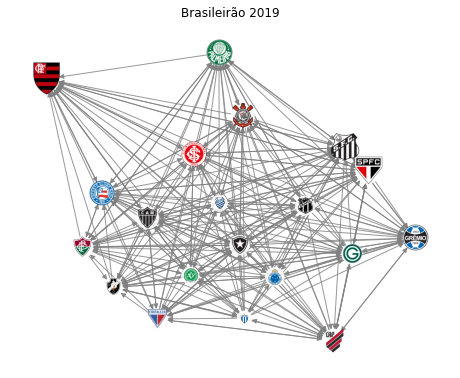

In [ ]:
get_graph_plot(relations, rank, 'Brasileirão 2019')

A partir dos pageranks e do grafo, é possível ver que o Flamengo foi o time mais importante do Brasileirão de 2019, seguido pelo Santos e São Paulo.

<h4>4.4.2 Brasileirão 2020</h4>
<p>Executando a função page_rank() aos dados de 2020, obtemos o seguinte resultado:</p>

In [ ]:
relations = json_to_dict('data/results2020new')
keys = list(relations.keys())
number_of_nodes = len(keys)
relations_matrix = get_relations_matrix(relations, keys)
rank_vector = page_rank(relations_matrix,number_of_nodes,iterations=185)
rank_vector_dict = dict(zip(keys,rank_vector))
rank = dict(sorted(rank_vector_dict.items(), key=lambda item: item[1]))

beautiful_rank(rank, keys, 20)

Atlético-MG      0.069838
São Paulo        0.061903
Internacional    0.061291
Flamengo         0.060012
Bragantino       0.057826
Fluminense       0.056949
Corinthians      0.055703
Palmeiras        0.055091
Santos           0.054514
Atlético-GO      0.053308
Fortaleza        0.050969
Athlético-PR     0.050850
Grêmio           0.049196
Sport            0.045446
Ceará            0.045332
Goiás            0.040748
Bahia            0.038945
Vasco            0.034653
Coritiba         0.030550
Botafogo-RJ      0.026878
dtype: float64

Visualmente:

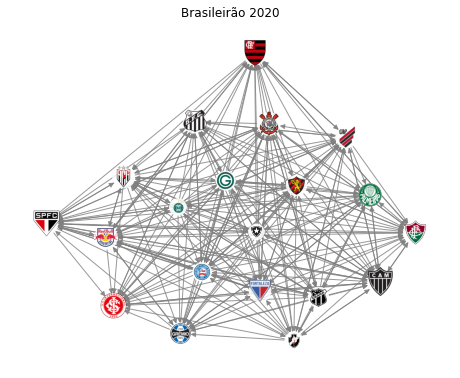

In [ ]:
get_graph_plot(relations,rank,"Brasileirão 2020")

Sendo assim, o Atlético Mineiro foi o time mais importante do Brasileirão de 2019, seguido pelo São Paulo e Internacional.

<h2>5 Conclusão</h2>
<p>Dado o que foi apresentado, pode-se afirmar que as técnicas de Álgebra Linear podem ser aplicadas até mesmo em contextos muito específicos, como visto na análise de partidas de futebol para o ranqueamento de importância de clubes. Além disso, é notável a importância que o Pagerank possui na vida das pessoas, visto que, sem ele, encontrar páginas relevantes na <i>web</i> seria uma tarefa extremamente difícil.</p>

<h2>6 Referências Bibliográficas</h2>

<p>MILLER, Colton. <b>A History Lesson on PageRank</b>. 2016. Disponível em: <a href="https://www.boostability.com/content/a-history-lesson-on-pagerank">https://www.boostability.com/content/a-history-lesson-on-pagerank</a>. Acesso em: 12 nov. 2021.
<p>AUSTIN, David. <b>How Google Finds Your Needle in the Web's Haystack. American Mathematical Society</b>. 2006. Disponível em: <a href="http://www.ams.org/publicoutreach/feature-column/fcarc-pagerank">http://www.ams.org/publicoutreach/feature-column/fcarc-pagerank</a>. Acesso em: 12 nov. 2021.</p>
<p>Oxford Reference. <b>Power Method</b>. Disponível em: <a href="https://www.oxfordreference.com/view/10.1093/oi/authority.20110803100341165">https://www.oxfordreference.com/view/10.1093/oi/authority.20110803100341165</a>. Acesso em: 12 nov. 2021.</p>
<p>KAMVAR, Taher. <b>The Second Eigenvalue of the Google Matrix</b>. Disponível em: <a href="http://www-cs-students.stanford.edu/~taherh/papers/secondeigenvalue.pdf">http://www-cs-students.stanford.edu/~taherh/papers/secondeigenvalue.pdf</a>. Acesso em: 12 nov. 2021.</p>
<p>GOOGLE. <b>Como funcionam os algoritmos da Pesquisa</b>. Disponível em: <a href="https://www.google.com/search/howsearchworks/algorithms/">https://www.google.com/search/howsearchworks/algorithms/</a>. Acesso em: 12 nov. 2021.